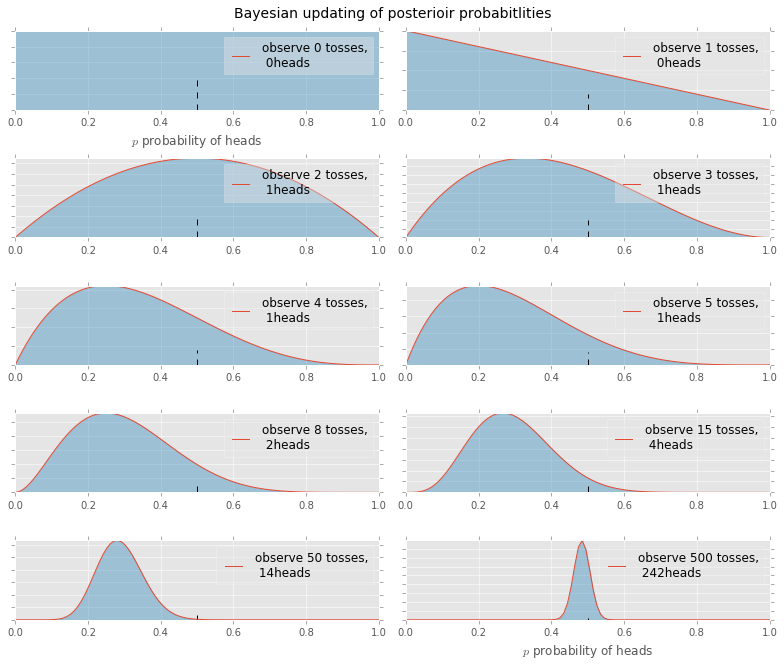

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

figsize(11, 9)
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel('$p$ probability of heads') \
        if k in  [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %dheads" % (N, heads))
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 0.4, color='k', linestyles='--', lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("Bayesian updating of posterioir probabitlities",
            y=1.02,
            fontsize=14)
plt.tight_layout()

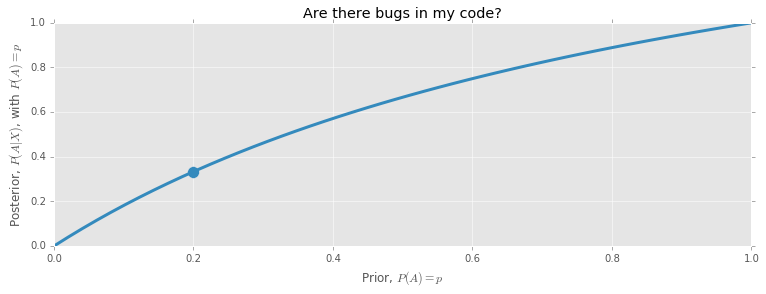

In [6]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 *p / (1 + p), color='#348ABD', lw=3)
plt.scatter(0.2, 2 * 0.2 / 1.2, s=140, c='#348ABD')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Prior, $P(A) = p$')
plt.ylabel('Posterior, $P(A|X)$, with $P(A) = p$')
plt.title('Are there bugs in my code?')

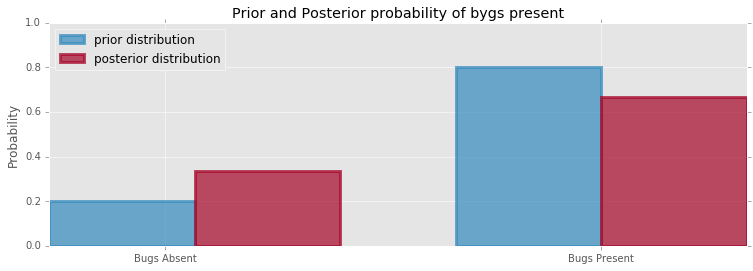

In [9]:
figsize(12.5, 4)
colours = ['#348ABD', '#A60628']

prior = [0.2, 0.8]
posterior = [1 / 3., 2 / 3.]
plt.bar([0, .7], prior, alpha=0.7, width=0.25,
       color=colours[0], label='prior distribution',
       lw='3', edgecolor=colours[0])

plt.bar([0+0.25, 0.7+0.25], posterior, alpha=0.7, width=0.25,
       color=colours[1], label='posterior distribution',
       lw='3', edgecolor=colours[1])

plt.ylim(0, 1)
plt.xticks([0.2, 0.95], ['Bugs Absent', 'Bugs Present'])
plt.title('Prior and Posterior probability of bygs present')
plt.ylabel('Probability')
plt.legend(loc='upper left')

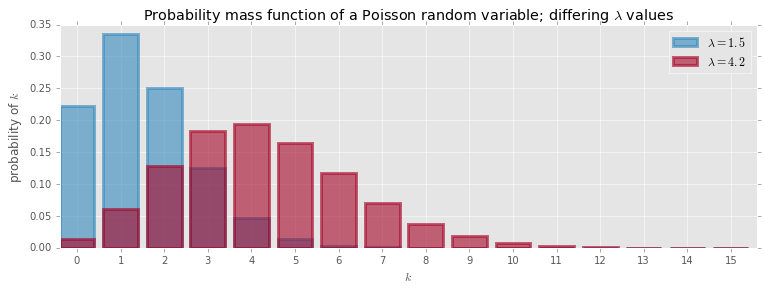

In [7]:
figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ['#348ABD', '#A60628']

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
       label='$\lambda = %.1f$' % lambda_[0], alpha=0.6,
       edgecolor=colours[0], lw=3)

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
       label='$\lambda = %.1f$' % lambda_[1], alpha=0.6,
       edgecolor=colours[1], lw=3)

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel('probability of $k$')
plt.xlabel('$k$')
plt.title('Probability mass function of a Poisson random variable; differing \
$\lambda$ values')

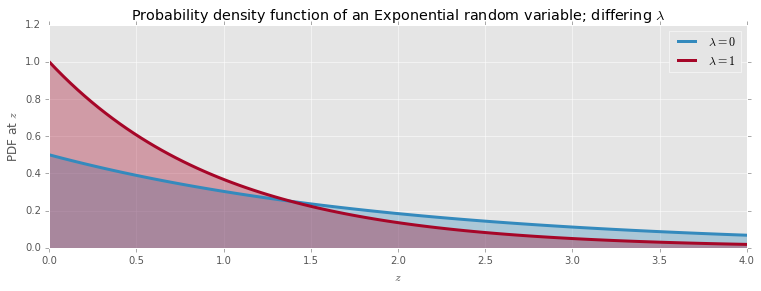

In [9]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
            color=c, label='$\lambda = %1.f$' % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel('PDF at $z$')
plt.xlabel('$z$')
plt.ylim(0, 1.2)
plt.title('Probability density function of an Exponential random variable;\
 differing $\lambda$')